# Background on entropy and biology

# Calculate -Entropy of columns in MSA

In [5]:
from Bio import SeqIO
import numpy as np

#####################################################################################################
#Script Name    : MSA_Column_Entropy.ipynb
#Description    : Given an aligned set of sequences calculate the entropy in a column
#Author         : Michael A Sennett 
#####################################################################################################


def get_AA_mut(direct, test_MSA):

    #create a dictionary from AA list
    #3 letter code order
    AA=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
    res_dct = dict(zip(AA, range(len(AA))))
    
    #skip over a particular sequence 
    MSA_arr=[]
    for ext_seq in SeqIO.parse(direct+test_MSA, "fasta"):
            MSA_arr.append(list(ext_seq.seq))

    #create a transposed MSA    
    MSA_trans=np.transpose(np.asarray(MSA_arr))
    
    #count total number of AA in each row
    H_arr=[]
    tot_AA_col=[]
    for i in range(len(MSA_trans)):
        C=20 
        for k in range(len(MSA_trans[0])):
            if MSA_trans[i][k] in AA:
                C+=1
            else:
                pass
        tot_AA_col.append(C)
    
    #calculate the entropy [p(x)*ln(p(x))] at each site in MSA, this first
    #section contains pseudocounts. If you remove pseudocounts remember that if an 
    #amino acid has 0 observations, then lim x->0 p(0)*ln(p(0))=0
    for i in range(len(MSA_trans)):
        tmp_H_arr=[]
        for j in range(len(AA)):
            c=1 
            for k in range(len(MSA_trans[0])):
                if MSA_trans[i][k]==AA[j]:
                    c+=1
                else:
                    pass
            prob=float(c/tot_AA_col[i])
            
            tmp_H_arr.append(-1*prob*np.log(prob))
        
        H_arr.append(sum(tmp_H_arr))
        
    return H_arr
#####################################################################################################
#
#provide directory and MSA
#
#####################################################################################################
direct=''
test_MSA='Apico_extant_test.a2m'


H_arr = get_AA_mut(direct, test_MSA)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

## Let us take a look at the distribution of negative entropies in a column

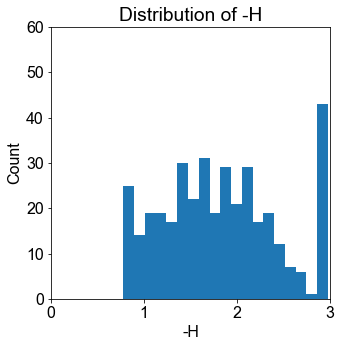

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Arial')
plt.rcParams.update({'font.size': 16})

num_bins=int(np.sqrt(len(H_arr)))
plt.figure(figsize=[5,5])
n,bins,patch=plt.hist(H_arr, num_bins)
plt.xlim(left=0, right=3)
plt.ylim(bottom=0, top=60)
plt.title('Distribution of -H')
plt.xlabel('-H')
plt.ylabel('Count')

plt.show()

## Let us visualize negative entropies along the alignment

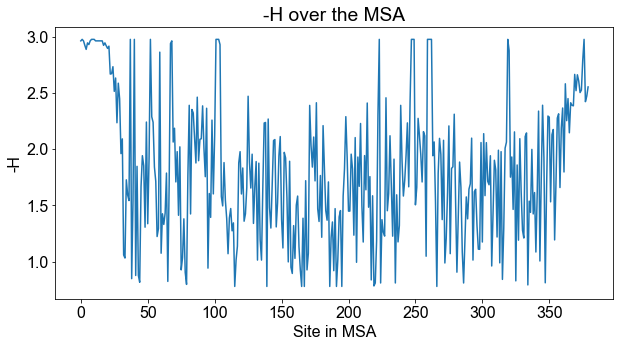

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Arial')
plt.rcParams.update({'font.size': 16})

sites=[]
for i in range(len(H_arr)):
    sites.append(int(i))

plt.figure(figsize=[10,5])
plt.plot(sites, H_arr)
plt.title('-H over the MSA')
plt.xlabel('Site in MSA')
plt.ylabel('-H')

plt.show()